In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataDir = "/content/drive/MyDrive/"

In [ ]:
import pandas as pd


In [ ]:
itemdf = pd.read_csv(dataDir + 'ml-100k/u.item', sep='|', encoding='latin-1', index_col=False, names=['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure','Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film_Noir',  'Horror', 'Musical','Mystery', 'Romance','Sci_Fi','Thriller', 'War', 'Western'])
# itemdf = itemdf.set_index('movie id')

In [ ]:
itemdf.head(2)

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
from collections import defaultdict

movie_dict = defaultdict(list)


In [ ]:
itemdf = itemdf.rename(columns={'movie id':'movie_id'})
itemdf.columns

Index(['movie_id', 'movie title', 'release date', 'video release date',
       'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film_Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci_Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [ ]:
genre_colums = ['unknown', 'Action', 'Adventure','Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film_Noir',  'Horror', 'Musical','Mystery', 'Romance','Sci_Fi','Thriller', 'War', 'Western']

In [ ]:
for index,item in itemdf.iterrows():
  for col in genre_colums:
    movie_dict[item['movie_id']].append(item[col])

In [ ]:
movie_dict[1]

[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
genre_df = pd.DataFrame(columns=['unknown', 'Action', 'Adventure','Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film_Noir',  'Horror', 'Musical','Mystery', 'Romance','Sci_Fi','Thriller', 'War', 'Western'])

In [ ]:
genre_df.head(5)

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western


In [ ]:
df_updated = pd.read_csv(dataDir + "/movielensRaj.txt")
# df_updated.columns =["movie_id", "user_id", "user_gender", "user_zip_code",
#                  "user_occupation_text", "bucketized_user_age","user_rating"]

df_updated.head()

,movie_id,user_id,user_gender,user_zip_code,user_occupation_text,user_age,user_rating
0,357,138,1,53211,doctor,45,4.0
1,709,92,1,80525,entertainment,25,2.0
2,412,301,1,55439,student,18,4.0
3,56,60,1,06472,healthcare,50,4.0
4,895,197,1,75094,technician,50,3.0


In [ ]:
df_updated_org = df_updated

Index(['movie_id', 'user_id', 'user_gender', 'user_zip_code',
       'user_occupation_text', 'user_age', 'user_rating'],
      dtype='object')

In [ ]:
for col in genre_colums:
  df_updated[col] = 0

In [ ]:

genre_index_dict = {}
count = 0
for genre in genre_colums:
  genre_index_dict[genre] = count
  count+=1


In [ ]:
genre_index_dict

{'Action': 1,
 'Adventure': 2,
 'Animation': 3,
 'Childrens': 4,
 'Comedy': 5,
 'Crime': 6,
 'Documentary': 7,
 'Drama': 8,
 'Fantasy': 9,
 'Film_Noir': 10,
 'Horror': 11,
 'Musical': 12,
 'Mystery': 13,
 'Romance': 14,
 'Sci_Fi': 15,
 'Thriller': 16,
 'War': 17,
 'Western': 18,
 'unknown': 0}

In [ ]:
df_updated.head(2)

,movie_id,user_id,user_gender,user_zip_code,user_occupation_text,user_age,user_rating,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,357,138,1,53211,doctor,45,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,709,92,1,80525,entertainment,25,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import numpy as np

In [ ]:
arr= np.array(df_updated.values.tolist())

In [ ]:
arr[0]

array(['357', '138', '1', '53211', 'doctor', '45', '4.0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0'], dtype='<U21')

In [ ]:
data_genre_dict = {}
for gen in genre_index_dict:
  data_genre_dict[gen]= genre_index_dict[gen] + 7

In [ ]:
data_genre_dict

{'Action': 8,
 'Adventure': 9,
 'Animation': 10,
 'Childrens': 11,
 'Comedy': 12,
 'Crime': 13,
 'Documentary': 14,
 'Drama': 15,
 'Fantasy': 16,
 'Film_Noir': 17,
 'Horror': 18,
 'Musical': 19,
 'Mystery': 20,
 'Romance': 21,
 'Sci_Fi': 22,
 'Thriller': 23,
 'War': 24,
 'Western': 25,
 'unknown': 7}

In [ ]:
max(data_genre_dict.values())

25

In [ ]:
movie_dict[265]

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [ ]:
for i in range(len(arr)):
  for j in range(7,26):
    arr[i][j] = movie_dict[int(arr[i][0])][j-7]


In [ ]:
arr[0]

array(['357', '138', '1', '53211', 'doctor', '45', '4.0', '0', '0', '0',
       '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0'], dtype='<U21')

In [ ]:
complete_column = df_updated.columns
complete_column

Index(['movie_id', 'user_id', 'user_gender', 'user_zip_code',
       'user_occupation_text', 'user_age', 'user_rating', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film_Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci_Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [ ]:
dataset = pd.DataFrame(arr, columns=complete_column)
dataset.head(2)

,movie_id,user_id,user_gender,user_zip_code,user_occupation_text,user_age,user_rating,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,357,138,1,53211,doctor,45,4.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,709,92,1,80525,entertainment,25,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
dataset.to_csv(dataDir+ 'movieLensRajUpdated.csv', index=False)


In [ ]:
!pip install -q tensorflow-recommenders
!pip install -q --upgrade tensorflow-datasets

In [ ]:
!pip install tensorflow-datasets==4.3

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_recommenders as tfrs

In [ ]:
!pip install -U deepctr-torch

In [ ]:
import numpy as np
import pandas as pd
import torch
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

from deepctr_torch.inputs import SparseFeat, VarLenSparseFeat, get_feature_names
from deepctr_torch.models import DeepFM


def split(x):
    key_ans = x.split('|')
    for key in key_ans:
        if key not in key2index:
            # Notice : input value 0 is a special "padding",so we do not use 0 to encode valid feature for sequence input
            key2index[key] = len(key2index) + 1
    return list(map(lambda x: key2index[x], key_ans))


    

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np

In [ ]:
dataDir


'/content/drive/MyDrive/'

In [ ]:
ratings = tfds.load("movie_lens/100k-ratings", split="train")
ratings = ratings.map(lambda x: {
    "movie_id": x["movie_id"],
    "user_id": x["user_id"],
    "user_rating": x["user_rating"],
    "user_gender": int(x["user_gender"]),
    "user_zip_code": x["user_zip_code"],
    "user_occupation_text": x["user_occupation_text"],
    "bucketized_user_age": int(x["bucketized_user_age"]),
})

In [ ]:
# ratings_data = [["" for y in range(7)] for x in range(100000)]


In [ ]:
tf.random.set_seed(42)
shuffled = ratings.shuffle(100_000, seed=42, reshuffle_each_iteration=False)

train = shuffled.take(80_000)
test = shuffled.skip(80_000).take(20_000)

In [ ]:
feature_names = ["movie_id", "user_id", "user_gender", "user_zip_code",
                 "user_occupation_text", "bucketized_user_age","user_rating"]

vocabularies = {}

for feature_name in feature_names:
  vocab = ratings.batch(1_000_000).map(lambda x: x[feature_name])
  vocabularies[feature_name] = np.concatenate(list(vocab))

In [ ]:
len(vocabularies['user_rating'])

100000

In [ ]:
import pandas as pd
df = pd.DataFrame(columns = ["movie_id", "user_id", "user_gender", "user_zip_code",
                 "user_occupation_text", "bucketized_user_age","user_rating"])
df.head()

,movie_id,user_id,user_gender,user_zip_code,user_occupation_text,bucketized_user_age,user_rating


In [ ]:
for feature_name in feature_names:
  df[feature_name] = vocabularies[feature_name]
df.head()

,movie_id,user_id,user_gender,user_zip_code,user_occupation_text,bucketized_user_age,user_rating
0,b'357',b'138',1,b'53211',b'doctor',45,4.0
1,b'709',b'92',1,b'80525',b'entertainment',25,2.0
2,b'412',b'301',1,b'55439',b'student',18,4.0
3,b'56',b'60',1,b'06472',b'healthcare',50,4.0
4,b'895',b'197',1,b'75094',b'technician',50,3.0


In [ ]:
# np.savetxt(dataDir + "movielensRaj.txt", df.values, fmt='%s')


In [ ]:
new_df = df

In [ ]:
    sparse_features = ["movie_id", "user_id",
                       "user_gender", "bucketized_user_age", "user_occupation_text", "user_zip_code", ]
    target = ['user_rating']

    # 1.Label Encoding for sparse features,and process sequence features
    for feat in sparse_features:
        lbe = LabelEncoder()
        df[feat] = lbe.fit_transform(df[feat])
    # preprocess the sequence feature

In [ ]:
    key2index = {}
    # genres_list = list(map(split, data['genres'].values))
    # genres_length = np.array(list(map(len, genres_list)))
    # max_len = max(genres_length)
    # Notice : padding=`post`
    # genres_list = pad_sequences(genres_list, maxlen=max_len, padding='post', )

    # 2.count #unique features for each sparse field and generate feature config for sequence feature

    fixlen_feature_columns = [SparseFeat(feat, df[feat].nunique(), embedding_dim=4)
                              for feat in sparse_features]

    # varlen_feature_columns = [VarLenSparseFeat(SparseFeat('genres', vocabulary_size=len(
        # key2index) + 1, embedding_dim=4), maxlen=max_len, combiner='mean')]  # Notice : value 0 is for padding for sequence input feature

    linear_feature_columns = fixlen_feature_columns
    dnn_feature_columns = fixlen_feature_columns 

    feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)

    # 3.generate input data for model
    model_input = {name: df[name] for name in sparse_features}  #
    # model_input["genres"] = genres_list

    # 4.Define Model,compile and train

    device = 'cpu'
    use_cuda = True
    if use_cuda and torch.cuda.is_available():
        print('cuda ready...')
        device = 'cuda:0'


cuda ready...


In [ ]:
# model_input

In [ ]:
# df[target].values

array([[4.],
       [2.],
       [4.],
       ...,
       [1.],
       [4.],
       [2.]], dtype=float32)

In [ ]:
    model = DeepFM(linear_feature_columns, dnn_feature_columns, task='regression', device=device)

    model.compile("adam", "mse", metrics=['mse'], )
    history = model.fit(model_input, df[target].values, batch_size=256, epochs=10, verbose=2, validation_split=0.2)

cuda:0
Train on 80000 samples, validate on 20000 samples, 313 steps per epoch
Epoch 1/10
4s - loss:  1.9109 - mse:  1.9096 - val_mse:  0.9140
Epoch 2/10
3s - loss:  0.8789 - mse:  0.8788 - val_mse:  0.9026
Epoch 3/10
3s - loss:  0.8652 - mse:  0.8650 - val_mse:  0.8985
Epoch 4/10
3s - loss:  0.8606 - mse:  0.8607 - val_mse:  0.9110
Epoch 5/10
4s - loss:  0.8580 - mse:  0.8578 - val_mse:  0.8969
Epoch 6/10
3s - loss:  0.8555 - mse:  0.8552 - val_mse:  0.8990
Epoch 7/10
3s - loss:  0.8538 - mse:  0.8537 - val_mse:  0.8962
Epoch 8/10
3s - loss:  0.8524 - mse:  0.8523 - val_mse:  0.8949
Epoch 9/10
4s - loss:  0.8515 - mse:  0.8511 - val_mse:  0.8947
Epoch 10/10
3s - loss:  0.8490 - mse:  0.8492 - val_mse:  0.8938


In [ ]:
# history.model.evaluate()

In [ ]:
dataDir

'/content/drive/MyDrive/'

In [ ]:
cached_train = train.shuffle(100_000).batch(8192).cache()
cached_test = test.batch(4096).cache()

In [ ]:
epochs = [5, 10, 15, 20]
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]
for epoch in epochs:
    print("###### Epoch :######", epoch)
    model = DeepFM(linear_feature_columns, dnn_feature_columns, task='regression', device=device)

    model.compile("adam", "mse", metrics=['mse'])
    history = model.fit(model_input, df[target].values, batch_size=256, epochs=epoch, verbose=2, validation_split=0.2)


In [ ]:
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error


    key2index = {}
    # genres_list = list(map(split, data['genres'].values))
    # genres_length = np.array(list(map(len, genres_list)))
    # max_len = max(genres_length)
    # Notice : padding=`post`
    # genres_list = pad_sequences(genres_list, maxlen=max_len, padding='post', )

    # 2.count #unique features for each sparse field and generate feature config for sequence feature

    fixlen_feature_columns = [SparseFeat(feat, df[feat].nunique(), embedding_dim=4)
                              for feat in sparse_features]

    # varlen_feature_columns = [VarLenSparseFeat(SparseFeat('genres', vocabulary_size=len(
        # key2index) + 1, embedding_dim=4), maxlen=max_len, combiner='mean')]  # Notice : value 0 is for padding for sequence input feature

    linear_feature_columns = fixlen_feature_columns
    dnn_feature_columns = fixlen_feature_columns 

    feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)

    # 3.generate input data for model
    train, test = train_test_split(df, test_size=0.15)
    train_model_input = {name: train[name] for name in feature_names}
    test_model_input = {name: test[name] for name in feature_names}
    # model_input["genres"] = genres_list

    # 4.Define Model,compile and train

    device = 'cpu'
    use_cuda = True
    if use_cuda and torch.cuda.is_available():
        print('cuda ready...')
        device = 'cuda:0'


cuda ready...


In [ ]:
history = model.fit(train_model_input, train[target].values, batch_size=256, epochs=10, verbose=2,
                        validation_split=(10/85))
pred_ans = model.predict(test_model_input, batch_size=256)
print("test MSE", round(mean_squared_error(test[target].values, pred_ans), 4))

cuda:0
Train on 70588 samples, validate on 9412 samples, 276 steps per epoch
Epoch 1/10
3s - loss:  0.8320 - mse:  0.8321 - val_mse:  0.8972
Epoch 2/10
3s - loss:  0.8254 - mse:  0.8253 - val_mse:  0.8939
Epoch 3/10
3s - loss:  0.8212 - mse:  0.8212 - val_mse:  0.8926
Epoch 4/10
3s - loss:  0.8184 - mse:  0.8185 - val_mse:  0.8966
Epoch 5/10
3s - loss:  0.8151 - mse:  0.8151 - val_mse:  0.8977
Epoch 6/10
3s - loss:  0.8137 - mse:  0.8136 - val_mse:  0.8931
Epoch 7/10
3s - loss:  0.8108 - mse:  0.8109 - val_mse:  0.8942
Epoch 8/10
3s - loss:  0.8103 - mse:  0.8102 - val_mse:  0.8914
Epoch 9/10
3s - loss:  0.8081 - mse:  0.8084 - val_mse:  0.8930
Epoch 10/10
3s - loss:  0.8060 - mse:  0.8059 - val_mse:  0.8904
test MSE 0.8726


In [ ]:
epochs = [5, 10, 15, 20]
for epoch in epochs:
    print("###### Number of Epochs in current episode : ", epoch," ######")
    model = DeepFM(linear_feature_columns, dnn_feature_columns, task='regression', device=device)

    model.compile("adam", "mse", metrics=['mse'])
    history = model.fit(train_model_input, train[target].values, batch_size=256, epochs=epoch, verbose=2, validation_split=(10/85))
    pred_ans = model.predict(test_model_input, batch_size=256)
    print("\n")
    print("test MSE", round(mean_squared_error(test[target].values, pred_ans), 4))
    print("\n")
    print("\n")

###### Number of Epochs in current episode :  5  ######
cuda:0
Train on 70588 samples, validate on 9412 samples, 276 steps per epoch
Epoch 1/5
3s - loss:  2.0417 - mse:  2.0405 - val_mse:  0.9375
Epoch 2/5
3s - loss:  0.8794 - mse:  0.8794 - val_mse:  0.9144
Epoch 3/5
3s - loss:  0.8633 - mse:  0.8633 - val_mse:  0.9153
Epoch 4/5
3s - loss:  0.8580 - mse:  0.8579 - val_mse:  0.9090
Epoch 5/5
3s - loss:  0.8547 - mse:  0.8547 - val_mse:  0.9073


test MSE 0.893




###### Number of Epochs in current episode :  10  ######
cuda:0
Train on 70588 samples, validate on 9412 samples, 276 steps per epoch
Epoch 1/10
3s - loss:  2.0417 - mse:  2.0405 - val_mse:  0.9375
Epoch 2/10
3s - loss:  0.8794 - mse:  0.8794 - val_mse:  0.9144
Epoch 3/10
3s - loss:  0.8633 - mse:  0.8633 - val_mse:  0.9153
Epoch 4/10
3s - loss:  0.8580 - mse:  0.8579 - val_mse:  0.9090
Epoch 5/10
3s - loss:  0.8547 - mse:  0.8547 - val_mse:  0.9073
Epoch 6/10
3s - loss:  0.8539 - mse:  0.8538 - val_mse:  0.9104
Epoch 7/10
3s

In [ ]:
epochs = [5, 10, 15, 20]
for epoch in epochs:
    print("###### Number of Epochs in current episode : ", epoch," ######")
    model = DeepFM(linear_feature_columns, dnn_feature_columns, task='regression', device=device)

    model.compile("adam", "mse", metrics=['mse'])
    history = model.fit(train_model_input, train[target].values, batch_size=256, epochs=epoch, verbose=2, validation_split=(10/85))
    pred_ans = model.predict(test_model_input, batch_size=256)
    print("\n")
    print("test MSE", round(mean_squared_error(test[target].values, pred_ans), 4))
    print("\n")
    print("\n")

In [ ]:
def run_models(epochs=8,
               num_runs=3):
  models = []
  mses = []

  for i in range(num_runs):
    model = DeepFM(linear_feature_columns, dnn_feature_columns, task='regression', device=device)
    model.compile("adam", "mse", metrics=['mse'])
    models.append(model)
    history = model.fit(train_model_input, train[target].values, batch_size=256, epochs=epoch, verbose=2, validation_split=(10/85))
    pred_ans = model.predict(test_model_input, batch_size=256)

    
    mses.append(mean_squared_error(test[target].values, pred_ans))

  mean = np.average(mses)

  return {"model": models, "mean": mean, "history": history}

In [ ]:
def hyperTest(use_cross_layer=True, parallel=True, projection_dim=None):
  epochs = [5, 10, 15, 20]
  # learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]
  # deep_layer_sizes = [[192, 192], [256, 128], [512, 256, 128]]

  best_params = None
  best_metric = 100000
  best_model = None
  params = []
  for epoch in epochs:
        temp_result = run_models(
                                 epochs=epoch, 
                                 )
        param = dict([('epoch', epoch), 
                      ('mean', temp_result['mean']), 
                      ('history', temp_result['history'])])
        print(param)
        params.append(param)
        if best_metric > temp_result["mean"]:
          best_metric = temp_result["mean"]
          best_params = param
          best_model = temp_result
  
  return {'best_metric': best_metric, 'best_params': best_params, 'best_model': best_model, 'params': params}

In [ ]:
hyper_result = hyperTest()

cuda:0
Train on 70588 samples, validate on 9412 samples, 276 steps per epoch
Epoch 1/20
3s - loss:  2.0417 - mse:  2.0405 - val_mse:  0.9375
Epoch 2/20
3s - loss:  0.8794 - mse:  0.8794 - val_mse:  0.9144
Epoch 3/20
3s - loss:  0.8633 - mse:  0.8633 - val_mse:  0.9153
Epoch 4/20
3s - loss:  0.8580 - mse:  0.8579 - val_mse:  0.9090
Epoch 5/20
3s - loss:  0.8547 - mse:  0.8547 - val_mse:  0.9073
Epoch 6/20
3s - loss:  0.8539 - mse:  0.8538 - val_mse:  0.9104
Epoch 7/20
3s - loss:  0.8528 - mse:  0.8528 - val_mse:  0.9123
Epoch 8/20
3s - loss:  0.8515 - mse:  0.8515 - val_mse:  0.9162
Epoch 9/20
3s - loss:  0.8502 - mse:  0.8504 - val_mse:  0.9118
Epoch 10/20
3s - loss:  0.8492 - mse:  0.8493 - val_mse:  0.9085
Epoch 11/20
3s - loss:  0.8496 - mse:  0.8496 - val_mse:  0.9087
Epoch 12/20
3s - loss:  0.8484 - mse:  0.8484 - val_mse:  0.9143
Epoch 13/20
3s - loss:  0.8479 - mse:  0.8480 - val_mse:  0.9135
Epoch 14/20
3s - loss:  0.8475 - mse:  0.8475 - val_mse:  0.9085
Epoch 15/20
3s - loss:

In [ ]:
def plotHistory(history):
  rmse = history.history['mse']
  val_rmse = history.history['val_mse']

  loss = history.history['loss']
  # val_loss = history.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(rmse, label='Training MSE')
  plt.plot(val_rmse, label='Validation MSE')
  plt.legend(loc='lower right')
  plt.ylabel('RMSE')
  plt.ylim([min(plt.ylim()),2])
  plt.title('Training and Validation MSE')

  # plt.subplot(2, 1, 2)
  # plt.plot(loss, label='Training Loss')
  # # plt.plot(val_loss, label='Validation Loss')
  # plt.legend(loc='upper right')
  # plt.ylabel('Loss')
  # plt.ylim([0,2.0])
  # plt.title('Training Loss')
  # plt.xlabel('epoch')
  # plt.show()

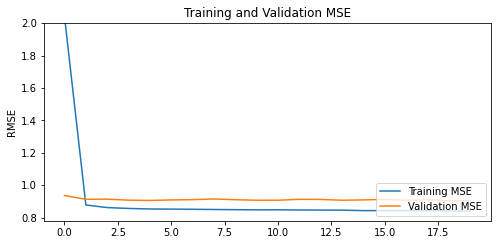

In [ ]:
plotHistory(hyper_result['best_params']['history'])